In [2]:
# @title HW 1
# @markdown Student Info
# @markdown Name: [Skyler Thomas]
# @markdown JHED-ID: [sthom215]

# @markdown Load up the calcium image video in the file: TEST MOVIE 00001-small-motion.tif. This file represents the raw fluorescence video in TIF format, common for calcium imaging.

import os
from pathlib import Path
import numpy as np
home = Path.cwd()

# Problem 5: Matrix factorization 
The above procedure is common in many labs, however can cause errors due to the dependency on
the summary image and the multiple stages of processing. Matrix factorization has emerged as an
alternative approach for identifying ROIs from the full spatio-temporal video. Here we will explore
three different types of factorization and compare the results using a table.

## Part B

Now try ICA for the same pixels-by-time matrix as in part A (for a specific number of
components you find reasonable).

In [16]:
def generate_ica_data(samples=1000, seed=0):
    np.random.seed(seed)
    # Time vector for signal generation
    time = np.linspace(0, 10, samples)

    # Independent components
    s1 = np.sin(2 * time)  # Sine wave
    s2 = np.cos(3 * time)  # Cosine wave
    s3 = np.sin(4 * time)  # Another sine wave with different frequency
    s4 = np.random.normal(size=samples)  # Gaussian noise

    # Stack components into a single 2D array of shape (4, samples)
    S = np.vstack((s1, s2, s3, s4))

    # Mixing matrix
    A = np.array([[1, 1, 1, 1], [0, 1, 0, 2], [1, 0, 2, 1], [2, 2, 1, 0]])

    # Mixed signals
    X = A @ S

    return X, S, A

# Generate data
X, S, A = generate_ica_data()

In [68]:
# import numpy as np
# import jax.numpy as jnp
# import jax.numpy.linalg as la
# from numpy.typing import NDArray


# ########### Independent Component Analysis ############
# # https://en.wikipedia.org/wiki/FastICA

# class ICA:
#     def __init__(self, n_components: int = 1) -> None:
#         self.n_components = n_components

#     def fit(self, X, max_iter: int = 200, tol: float = 1e-4):
#         self._pre_process(X)
#         for idx in range(self.n_components):
#             w = self.W[:, idx]
#             for _ in range(max_iter):
#                 w_plus = self._update(w, X)
#                 if idx > 1:
#                     w_plus = self._orthogonalize(w_plus, idx)
#                 w_plus /= la.norm(w_plus, 2)
#                 if la.norm(w_plus - w) < tol:
#                     break
#             self.W[:, idx] = w_plus
#         return self.W

#     def fit_transform(self, X):
#         W = self.fit(X)
#         return jnp.dot(W.T, X)

#     def _pre_process(self, X):
#         self._X_reshaped = X.reshape(X.shape[0], -1)
#         self._X_reshaped = self._whiten(self._X_reshaped)
#         self._init_random()

#     def _init_random(self):
#         t, _ = self._X_reshaped.shape
#         self.W = np.random.normal(size=(t, self.n_components))
#         self.W /= self.W.mean(axis=0)

#     def _update(self, w, X):
#         term1 = jnp.dot(X, self._g(jnp.dot(w.T,X)).T)
#         term2 = jnp.multiply(self._g_prime(jnp.sum(jnp.dot(w.T, X))),jnp.sum(w))
#         return term1 - term2    

#     def _orthogonalize(self, w, idx):
#         inner_product = jnp.multiply(self.W[:, idx], w)
#         inner_product = jnp.sum(inner_product, axis=0)
#         return w - jnp.sum(inner_product)

#     def _whiten(self, X):
#         cov = jnp.cov(X)
#         D, E = la.eig(cov)
#         D_sqrt = jnp.diag(jnp.sqrt(D))
#         return jnp.dot(jnp.dot(D_sqrt, E.T), X)

#     def _f(self, X):
#         # return jnp.log(jnp.cosh(X))
#         return -jnp.exp(-0.5*jnp.square(X))

#     def _g(self, X):
#         # return jnp.tanh(X)
#         return -jnp.multiply(X, jnp.exp(-0.5*jnp.square(X)))

#     def _g_prime(self, X):
#         # return 1 - jnp.square(jnp.tanh(X))
#         return jnp.multiply((1 - jnp.square(X)), jnp.exp(-0.5*jnp.square(X)))


In [75]:
from sthom215_problem_5_ex_3 import ICA

ica = ICA(4)
w = np.random.normal(0,1, size=(4, 1))
# (ica._update(w,X)).shape
sol = ica.fit_transform(X)

In [76]:
sol.shape

(4, 1000)

Text(0.5, 1.0, 'Comp3')

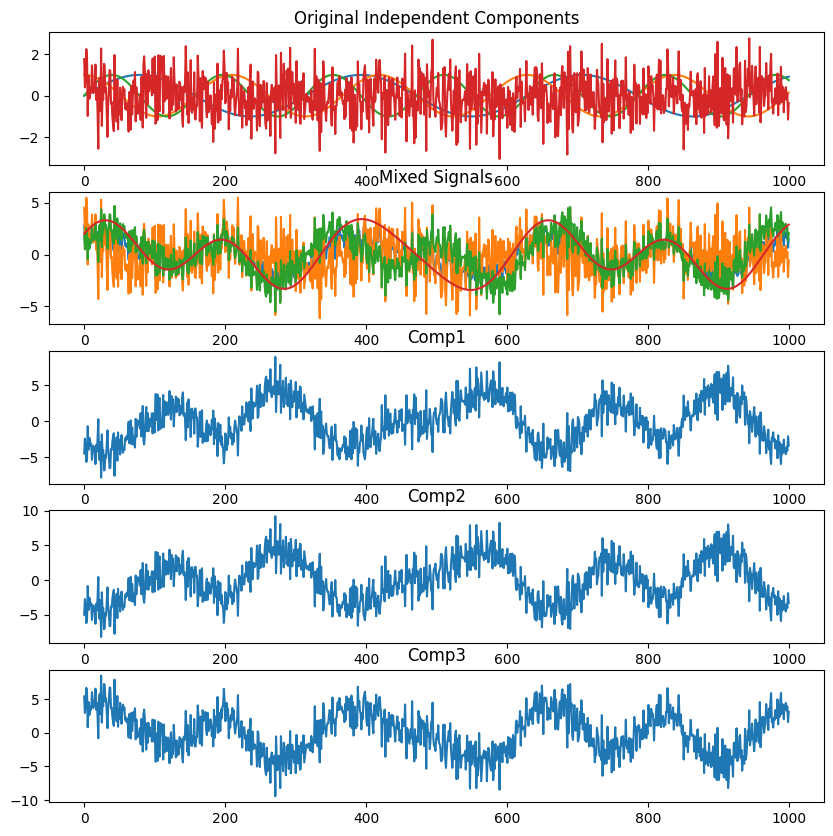

In [79]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5, 1, figsize=(10, 10))
axs[0].plot(S.T)
axs[0].set_title("Original Independent Components")
axs[1].plot(X.T)
axs[1].set_title("Mixed Signals")
axs[2].plot(sol[0,:].T)
axs[2].set_title("Comp1")
axs[3].plot(sol[1,:].T)
axs[3].set_title("Comp2")
axs[4].plot(sol[2,:].T)
axs[4].set_title("Comp3")

### What are the differences that you note?
